Connected to usr (Python 3.12.9)

## Setting up the environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Set up visualization style
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

## Loading the data

In [15]:
"""
DOWNLOAD BOTH DATASETS
"""

# Load state-level data
state_data_url = "https://api.covidtracking.com/v1/states/daily.csv"
state_df = pd.read_csv(state_data_url)

# Load national data
national_data_url = "https://api.covidtracking.com/v1/us/daily.csv"
national_df = pd.read_csv(national_data_url)

## Initial data exploration

In [16]:
"""
CHECKING THE STATE DATA
"""

print("State Data Overview:")
print(f"Number of rows: {state_df.shape[0]}")
print(f"Number of columns: {state_df.shape[1]}")
print("\nFirst 5 rows:")
display(state_df.head())
print("\nData types:")
print(state_df.dtypes)

State Data Overview:
Number of rows: 20780
Number of columns: 56

First 5 rows:


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN



Data types:
date                             int64
state                           object
positive                       float64
probableCases                  float64
negative                       float64
pending                        float64
totalTestResultsSource          object
totalTestResults               float64
hospitalizedCurrently          float64
hospitalizedCumulative         float64
inIcuCurrently                 float64
inIcuCumulative                float64
onVentilatorCurrently          float64
onVentilatorCumulative         float64
recovered                      float64
lastUpdateEt                    object
dateModified                    object
checkTimeEt                     object
death                          float64
hospitalized                   float64
hospitalizedDischarged         float64
dateChecked                     object
totalTestsViral                float64
positiveTestsViral             float64
negativeTestsViral             float64
positiveCase

In [17]:
"""
CHECKING THE NATIONAL DATA
"""

print("\nNational Data Overview")
print(f"Number of rows: {national_df.shape[0]}")
print(f"Number of columns: {national_df.shape[1]}")
print("\nFirst 5 rows:")
display(national_df.head())
print("\nData types:")
print(national_df.dtypes)


National Data Overview
Number of rows: 420
Number of columns: 25

First 5 rows:


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0



Data types:
date                          int64
states                        int64
positive                    float64
negative                    float64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
dateChecked                  object
death                       float64
hospitalized                float64
totalTestResults              int64
lastModified                 object
recovered                   float64
total                         int64
posNeg                        int64
deathIncrease                 int64
hospitalizedIncrease          int64
negativeIncrease              int64
positiveIncrease              int64
totalTestResultsIncrease      int64
hash                         object
dtype: object


## Data cleaning

### Convert dates to proper format

In [21]:
"""
FOR STATE DATA
"""

state_df['date'] = pd.to_datetime(state_df['date'], format='%Y%m%d')

In [19]:
"""
FOR NATIONAL DATA
"""

national_df['date'] = pd.to_datetime(national_df['date'], format='%Y%m%d')

### Porcentage of missing values

In [ ]:
"""
PERCENTAGE STATE DATA
"""

print("State Data - Missing Values (%):")
print((state_df.isnull().sum() / len(state_df) * 100).sort_values(ascending=False))


State Data - Missing Values (%):
dataQualityGrade               100.000000
grade                          100.000000
positiveTestsPeopleAntigen      96.953802
negativeTestsPeopleAntibody     95.322425
totalTestsPeopleAntigen         95.192493
positiveTestsPeopleAntibody     94.735322
onVentilatorCumulative          93.792108
negativeTestsAntibody           92.983638
pending                         89.711261
totalTestsPeopleAntibody        89.412897
positiveTestsAntigen            89.254090
hospitalizedDischarged          85.226179
positiveTestsAntibody           83.897979
totalTestsAntigen               83.537055
inIcuCumulative                 81.766121
totalTestsAntibody              76.953802
negativeTestsViral              75.822907
totalTestEncountersViral        74.826756
deathProbable                   63.460058
positiveTestsViral              56.891242
onVentilatorCurrently           56.082772
totalTestsPeopleViral           55.741097
probableCases                   55.384986
d

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,NaN
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN



Data types:


In [23]:
"""
PERCENTAGE NATIONAL DATA
"""

print("National Data - Missing Values (%):")
print((national_df.isnull().sum() / len(national_df) * 100).sort_values(ascending=False))

National Data - Missing Values (%):
recovered                   100.000000
onVentilatorCumulative       18.809524
inIcuCurrently               17.380952
inIcuCumulative              17.142857
onVentilatorCurrently        17.142857
hospitalizedCurrently        15.238095
hospitalized                 12.142857
hospitalizedCumulative       12.142857
pending                      12.142857
negative                     11.428571
death                         6.666667
positive                      0.238095
date                          0.000000
states                        0.000000
dateChecked                   0.000000
totalTestResults              0.000000
lastModified                  0.000000
total                         0.000000
posNeg                        0.000000
deathIncrease                 0.000000
hospitalizedIncrease          0.000000
negativeIncrease              0.000000
positiveIncrease              0.000000
totalTestResultsIncrease      0.000000
hash                        

#### Drop colimns with >50% missing values

In [ ]:
"""
CLEANING STATE DATA
"""

threshold = 50
cols_to_drop = state_df.columns[state_df.isnull().mean() * 100 > threshold]
state_df = state_df.drop(columns=cols_to_drop)

print("State Data - Missing Values (%):")
print((state_df.isnull().sum() / len(state_df) * 100).sort_values(ascending=False))


State Data - Missing Values (%):
inIcuCurrently              44.003850
recovered                   42.237729
hospitalizedCumulative      40.413859
hospitalized                40.413859
negative                    36.044273
positiveCasesViral          31.443696
totalTestsViral             30.144370
hospitalizedCurrently       16.559192
death                        4.090472
lastUpdateEt                 2.964389
checkTimeEt                  2.964389
dateModified                 2.964389
dateChecked                  2.964389
positive                     0.904716
totalTestResults             0.798845
totalTestResultsSource       0.000000
date                         0.000000
state                        0.000000
fips                         0.000000
positiveIncrease             0.000000
negativeIncrease             0.000000
total                        0.000000
totalTestResultsIncrease     0.000000
posNeg                       0.000000
deathIncrease                0.000000
hospitalizedIncre

,date,state,positive,negative,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,recovered,...,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
0,2021-03-07,AK,56886.0,NaN,totalTestsViral,1731628.0,33.0,1293.0,NaN,NaN,...,0,56886,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0
1,2021-03-07,AL,499819.0,1931711.0,totalTestsPeopleViral,2323788.0,494.0,45976.0,NaN,295690.0,...,2347,2431530,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0
2,2021-03-07,AR,324818.0,2480716.0,totalTestsViral,2736442.0,335.0,14926.0,141.0,315517.0,...,3380,2805534,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0
3,2021-03-07,AS,0.0,2140.0,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,...,0,2140,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0
4,2021-03-07,AZ,826454.0,3073010.0,totalTestsViral,7908105.0,963.0,57907.0,273.0,NaN,...,45110,3899464,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0



Data types:


#### Compute missing data by state for columns missing 30% to 45% of data

In [26]:
"""
FINDING DATA IN THE LOOKED PERCENTAGE
"""

missing = state_df.isnull().mean() * 100
cols = missing[(missing >= 30) & (missing <=45)].index.tolist()

print("Columns with 30-45% missing values:")
print(cols)


Columns with 30-45% missing values:
['negative', 'hospitalizedCumulative', 'inIcuCurrently', 'recovered', 'hospitalized', 'totalTestsViral', 'positiveCasesViral']


In [28]:
"""
COMPUTE MISSING DATA
"""

missing_analysis = state_df.groupby('state')[cols].apply(lambda x: x.isnull().mean() *100)

print("\nAverage missing percentage by state:")
display(missing_analysis)


Average missing percentage by state:


,negative,hospitalizedCumulative,inIcuCurrently,recovered,hospitalized,totalTestsViral,positiveCasesViral
state,,,,,,,
AK,100.000000,0.817439,100.000000,38.964578,0.817439,0.000000,100.000000
AL,0.819672,7.650273,100.000000,20.765027,7.650273,100.000000,0.000000
AR,0.000000,7.084469,51.771117,5.177112,7.084469,0.000000,0.000000
AS,4.201681,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000
AZ,0.000000,0.000000,10.840108,100.000000,0.000000,0.000000,26.829268
CA,86.720867,100.000000,6.233062,100.000000,100.000000,0.000000,0.000000
CO,0.000000,3.523035,100.000000,100.000000,3.523035,100.000000,13.550136
CT,100.000000,53.083110,100.000000,51.474531,53.083110,0.000000,24.932976
DC,100.000000,100.000000,15.489130,5.706522,100.000000,100.000000,100.000000


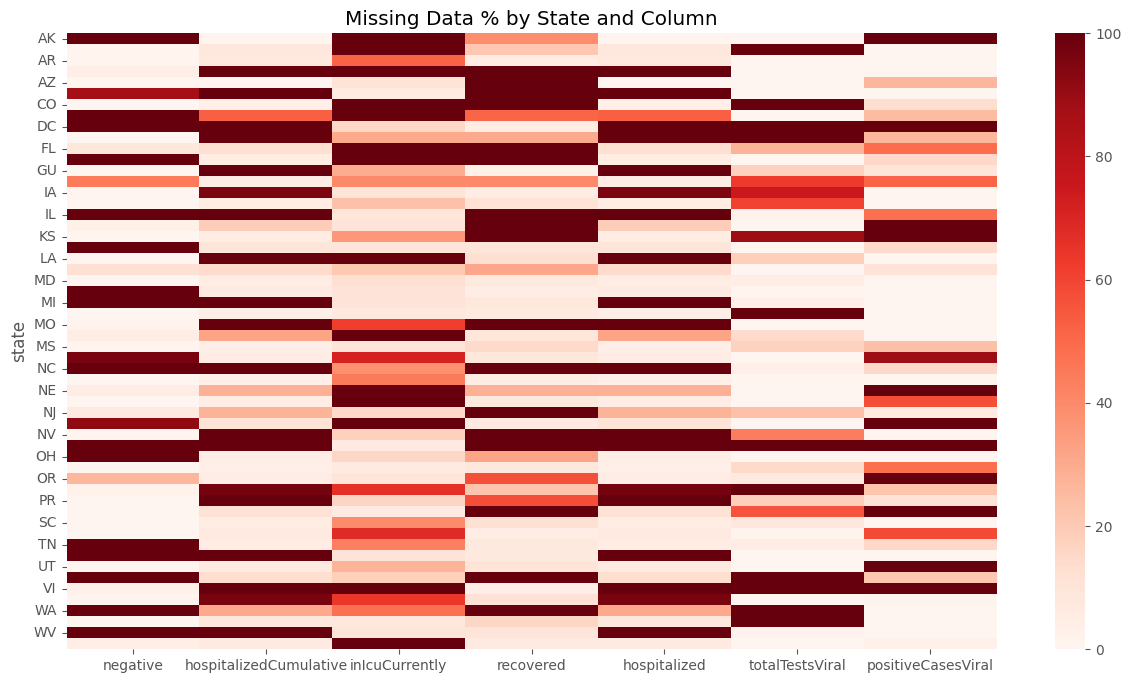

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(missing_analysis, cmap="Reds", vmin=0, vmax=100)
plt.title("Missing Data % by State and Column")
plt.show()